In [1]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('../twitter_config.json') as c:
    params = json.load(c)
    
consumer_key = params["API_KEY"]
consumer_secret = params["APP_SECRET_KEY"]
access_token = params["ACCESS_TOKEN"]
access_token_secret = params["ACCESS_TOKEN_SECRET"]

In [3]:
class Authenticator():
    def authenticate(self):
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        return auth

In [4]:
class Client():
    def __init__(self, username):
        self.auth = Authenticator().authenticate()
        self.api = tweepy.API(self.auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        self.username = username
    
    def get_user_info(self):
        user = self.api.get_user(self.username)
        first_name, *_ = user.name.split(" ")
        info = {
            'Name': user.name,
            'Description': user.description,
            'Created_at': user.created_at.strftime("%d %b, %Y, %H:%M:%S"),
            'Total Likes by '+first_name: user.favourites_count,
            'Followers': user.followers_count,
            'Friends': user.friends_count,
            'Id': user.id,
            'Id_str': user.id_str,
            'Location': user.location,
            'Total statuses': user.statuses_count
        }
        return info
    def get_followers(self):
        user = self.api.get_user(self.username)
        first_name, *_ = user.name.split(" ")
        info = []

        for follower in tweepy.Cursor(self.api.followers, screen_name = self.username).items(10):
            username = follower.screen_name
            name = follower.name
            followers = follower.followers_count
            friends = follower.friends_count
            info.append([name, username, followers, friends])



        info_df = pd.DataFrame(info, columns = ['name', 'username', 'followers', 'friends'])
        return info_df

    def get_friends(self):
        user = self.api.get_user(self.username)
        first_name, *_ = user.name.split(" ")
        info = []

        for friend in tweepy.Cursor(self.api.friends, screen_name = self.username).items(10):
            username = friend.screen_name
            name = friend.name
            followers = friend.followers_count
            friends = friend.friends_count
            info.append([name, username, followers, friends])



        info_df = pd.DataFrame(info, columns = ['name', 'username', 'followers', 'friends'])
        return info_df

In [11]:
info = Client('ajeetsparmar')
# info.get_user_info()
friends = info.get_friends()
friends

,name,username,followers,friends
0,University of Delhi,UnivofDelhi,6415,20
1,Lok Sabha Speaker,loksabhaspeaker,103608,5
2,Pranjal Singhal,Pranjalsinghal_,4,92
3,Ministry of Education,EduMinOfIndia,3034036,251
4,Boris Johnson,BorisJohnson,3045858,457
5,ADG PI - INDIAN ARMY,adgpi,6943227,105
6,PIB India,PIB_India,2162195,266
7,NASA,NASA,41031266,222
8,IUGS,theIUGS,2519,149
9,Indian Air Force,IAF_MCC,1837368,41


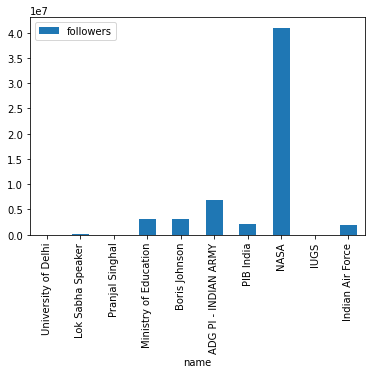

In [12]:
friends.plot('name','followers', kind = 'bar')
plt.show()

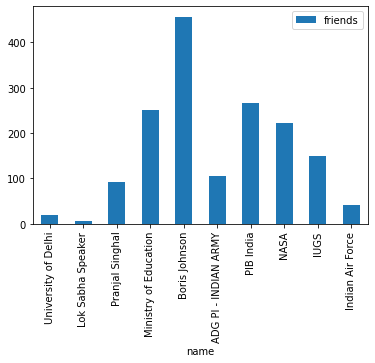

In [13]:
friends.plot('name','friends', kind = 'bar')
plt.show()

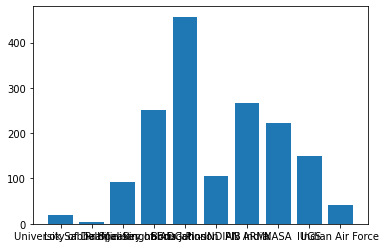

In [19]:
from matplotlib.figure import Figure

fig = Figure()
axis = fig.add_subplot(1, 1, 1)
info = Client('ajeetsparmar')
friends = info.get_friends()
axis.bar(friends.name, friends.friends)
fig

In [3]:
from datetime import datetime
print(datetime.now())

2020-10-11 21:16:30.862880
